<a href="https://colab.research.google.com/github/DucTran2810/Final-Project/blob/main/Training_Emotion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        102464    
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
157/157 [==============================] - 16s 25ms/step - loss: 2.0038 - acc: 0.1655 - val_loss: 1.8957 - val_acc: 0.1721
Epoch 2/25
157/157 [==============================] - 3s 18ms/step - loss: 1.8813 - acc: 0.1903 - val_loss: 1.9074 - val_acc: 0.1689
Epoch 3/25
157/157 [==============================] - 3s 18ms/step - loss: 1.8441 - acc: 0.2215 - val_loss: 1.9342 - val_acc: 0.1725
Epoch 4/25
157/157 [==============================] - 3s 18ms/step - loss: 1.8003 - acc: 0.2448 - val_loss: 1.8011 - val_acc: 0.2442
Epoch 5/25
157/157 [==============================] - 3s 18ms/step - loss: 1.7714 - acc: 0.2612 - val_loss: 1.7692 - val_acc: 0.2661
Epoch 6/25
157/157 [==============================] - 3s 18ms/step - loss: 1.7431 - acc: 0.2751 - val_loss: 1.7460 - val_acc: 0.2793
Epoch 7/25
157/157 [==============================] - 3s 19ms/step - loss: 1.7270 - acc: 0.2930 - val_loss: 1.7655 - val_acc: 0.2916
Epoch 8/25
157/157 [==============================] - 3s 18ms/step -

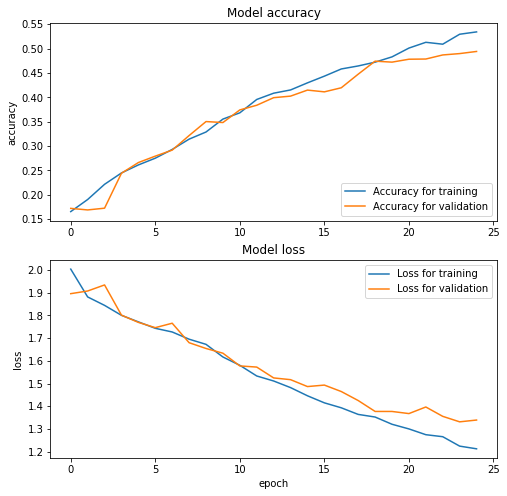

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
# Load Data 
with open('./drive/MyDrive/Data_for_Training_Emotion_1.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train,7)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
#Khởi tạo model
model = Sequential()
#1st CNN layer
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same',input_shape = (48,48,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#2nd CNN layer
model.add(Conv2D(64, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#3rd CNN layer
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#4th CNN layer
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#5th CNN layer
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
#Fully connected layer 1st layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
#Fully connected layer 2nd layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 25, batch_size = 64, validation_split = 0.2)
model.save('./model_emotion_official.h5')
#Draw
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Accuracy for training')
plt.plot(val_f1, label='Accuracy for validation')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss for training')
plt.plot(val_loss, label='Loss for validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.show()